In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz


    1.  fLength:  continuous  # major axis of ellipse [mm]

    2.  fWidth:   continuous  # minor axis of ellipse [mm] 

    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]

    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]

    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]

    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]

    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 

    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]

    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]

   10.  fDist:    continuous  # distance from origin to center of ellipse [mm]

   11.  class:    g,h         # gamma (signal), hadron (background)



   g = gamma (signal):     12332

   h = hadron (background): 6688


In [148]:
# Define the column names for the dataset
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", 
        "fM3Trans", "fAlpha", "fDist", "class"]

# Load the dataset from the CSV file using the defined column names
# The 'names' parameter assigns the specified column names to the DataFrame
df = pd.read_csv("./file/magic04.data", names=cols)

# Display the first 5 rows of the DataFrame to verify data loading
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [149]:
# Print the unique value in the column
df["class"].unique()

array(['g', 'h'], dtype=object)

In [150]:
# Convert the 'class' column where 'g' becomes 1 and 'h' becomes 0
# The expression (df["class"] == "g") creates a boolean mask (True for 'g', False for 'h')
# .astype(int) converts True to 1 and False to 0
df["class"] = (df["class"] == "g").astype(int)

# Display the first 5 rows of the DataFrame to verify the conversion
df.head(n=5)

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

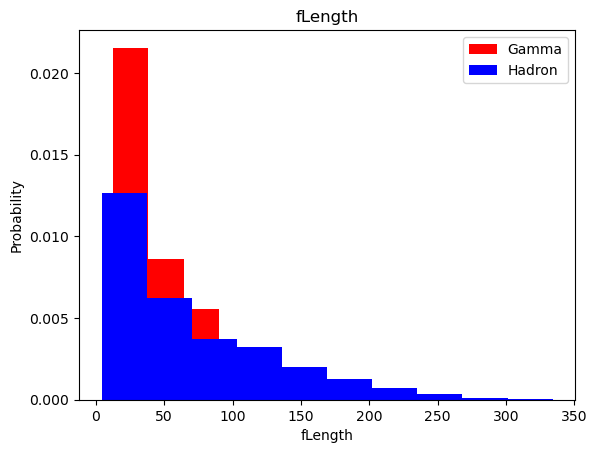

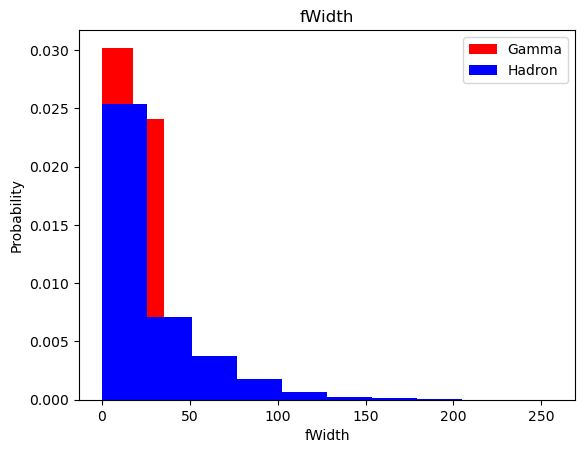

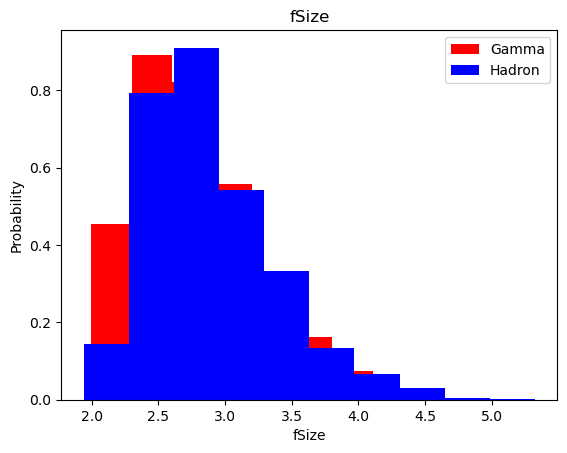

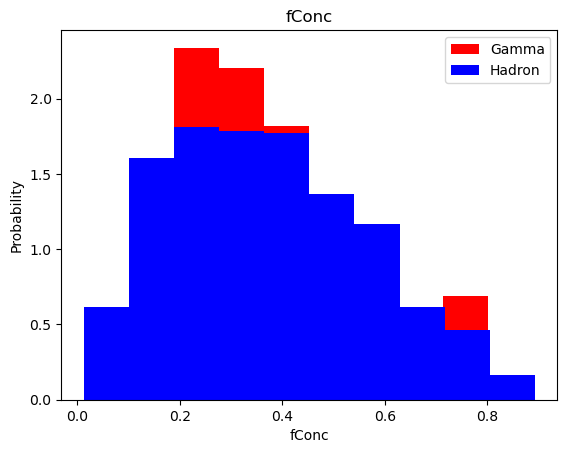

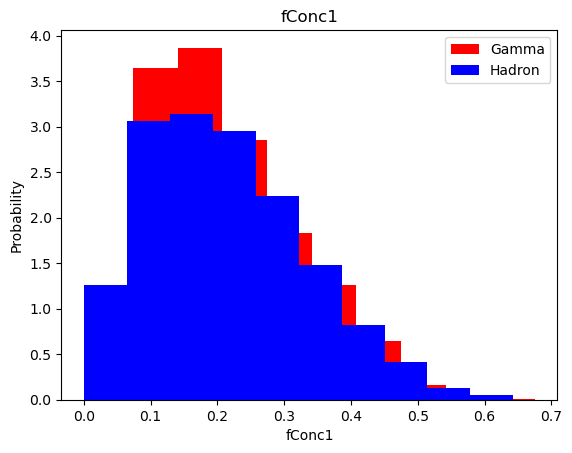

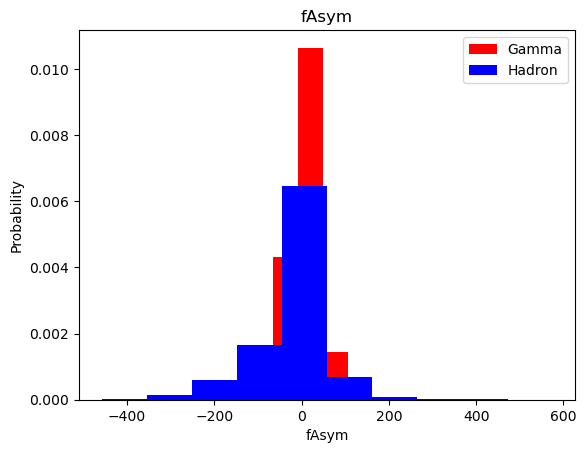

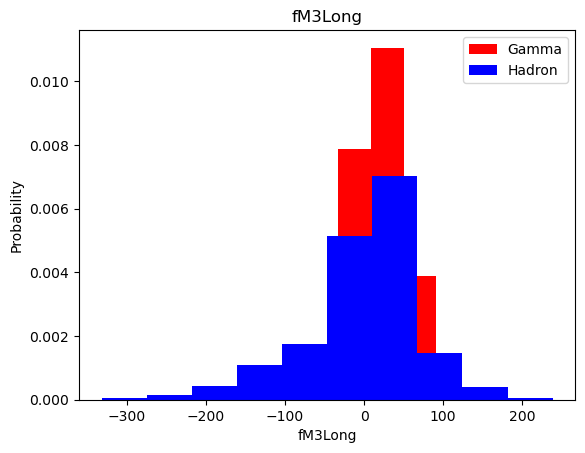

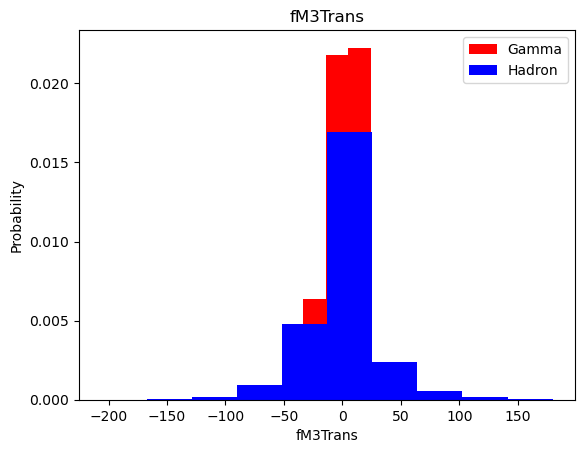

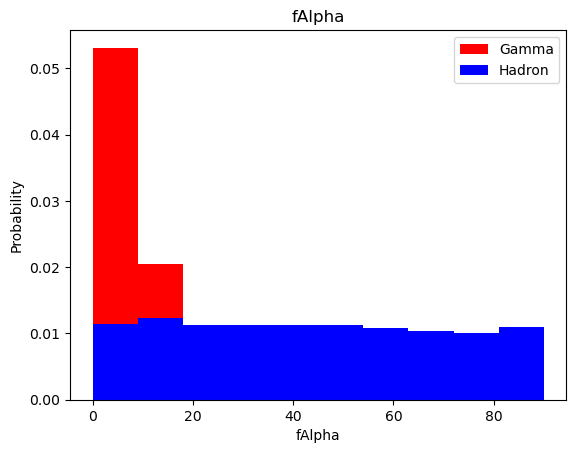

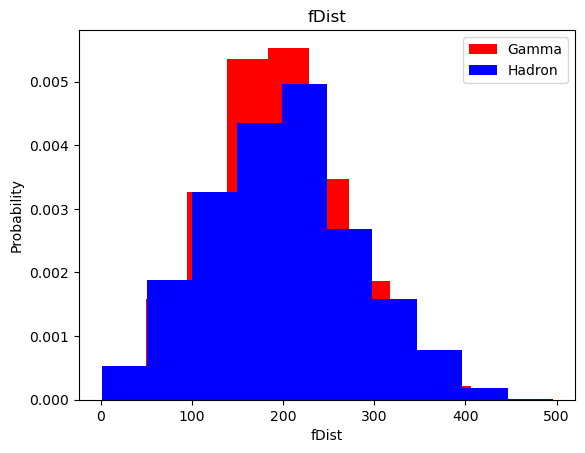

In [151]:
# Loop through each column in the DataFrame except the last one ('class')
for label in df.columns[:-1]:
    
    # Plot histogram for 'Gamma' class (where class is 1), using red color
    plt.hist(df[df["class"] == 1][label], color="red", label="Gamma", density=True)
    # Plot histogram for 'Hadron' class (where class is 0), using blue color
    plt.hist(df[df["class"] == 0][label], color="blue", label="Hadron", density=True)
    
    # Set the title of the plot as the column label being visualized
    plt.title(label)
    
    # Label for the y-axis indicating that it's showing probability
    plt.ylabel("Probability")
    # Label for the x-axis showing the current column being visualized
    plt.xlabel(label)
    
    # Display the legend to differentiate between 'Gamma' and 'Hadron'
    plt.legend()
    # Display the plot
    plt.show()


# Train, Validation, Test Datasets

In [152]:
## Shuffle the DataFrame using sample() method, frac=1 keeps all rows, and random_state ensures reproducibility
df_shuffled = df.sample(frac=1, random_state=42)

# Split the shuffled DataFrame into 3 parts:
# 60% for training, 20% for validation, and 20% for testing
train, valid, test = np.split(df_shuffled,
                              [int(0.6 * len(df)),  # First 60% for training
                               int(0.8 * len(df))]) # Next 20% for validation, rest for testing

/nix/store/gdckiap2g28wl5b5i8rhm98ijxkln6v7-python3.11-numpy-1.26.4/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [153]:
# Now you have train, valid, and test sets from the original DataFrame
train

fLength   fWidth   fSize   fConc  fConc1    fAsym   fM3Long  fM3Trans  \
18749   48.0573  11.0862  2.9571  0.3620  0.1882   0.4200   32.4358   -2.2992   
7051    23.4858   0.0000  2.2393  0.7378  0.3775  -2.9397   13.0915    0.0001   
10901   40.5429  19.4073  3.3382  0.2369  0.1269  29.1908   27.0567   -7.1243   
15858   16.6123   7.8423  2.5572  0.5829  0.3371   6.7271  -10.3448   -2.3240   
17968  205.4250  37.7936  3.2727  0.2167  0.1257  46.0952 -210.9350  -29.7478   
...         ...      ...     ...     ...     ...      ...       ...       ...   
87      34.8890  19.6402  2.8429  0.3747  0.2534  29.9825   29.1531   12.4846   
7630    20.3329  17.3059  2.6707  0.4098  0.2231  11.3876   -9.3600   12.8626   
4163    56.6139  26.1253  3.3259  0.1667  0.0862   0.5887   48.7686  -20.3598   
3382    59.4502  18.2507  2.6493  0.3991  0.2119  22.6093   62.4000    9.1050   
10917   17.3028  10.9575  2.3674  0.5966  0.3026  22.3107    9.5094    5.0140   

        fAlpha     fDist  class  
18749  26.9300  165.2240      0  
7051   19.3410  235.3420      1  
10901  10.0643  195.6030      1  
15858  14.5111  214.2655      0  
17968  60.0580  206.1730      0  
...        ...       ...    ...  
87      8.3760  227.3360      1  
7630   89.6161  164.0240      1  
4163    9.8420  203.8090      1  
3382    0.1321  177.6130      1  
10917  50.6820  195.4520      1  

[11412 rows x 11 columns]

In [154]:
# Function to scale the dataset and optionally oversample it
def scale_dataset(dataframe, oversample=False):
    # Separate the feature columns (X) and the target column (Y)
    X = dataframe[dataframe.columns[:-1]].values  # All columns except the last one (features)
    Y = dataframe[dataframe.columns[-1]].values   # The last column (target/class)

    # Standardize the feature columns using StandardScaler (mean=0, variance=1)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # If oversampling is requested, apply RandomOverSampler to balance the classes
    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y)  # Resample X and Y to handle class imbalance

    # Combine the scaled features (X) and the target column (Y) into one dataset horizontally
    data = np.hstack((X,
                     np.reshape(Y, (-1, 1)))) # Reshape the target variable Y into a column vector

    # Return the final dataset (data), along with the scaled features (X) and target (Y) separately
    return data, X, Y

In [155]:
# Scale and optionally oversample the training, validation, and test datasets

train, x_train, y_train = scale_dataset(train, oversample=True)
# 'train' is the scaled training dataset with balanced classes
# 'x_train' is the scaled feature data for training
# 'y_train' is the target (class) labels for training

valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

# K-Neighbours

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [157]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [158]:
y_pred = knn_model.predict(x_test)

In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1331
           1       0.85      0.85      0.85      2473

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [160]:
from sklearn.naive_bayes import GaussianNB

In [161]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [162]:
y_pred = nb_model.predict(x_test)

In [163]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.39      0.49      1331
           1       0.73      0.89      0.80      2473

    accuracy                           0.72      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.71      0.72      0.69      3804



# Logistic Regression

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [166]:
y_pred =  lr_model.predict(x_test)

In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1331
           1       0.84      0.81      0.82      2473

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# Support Vector Machine

In [168]:
from sklearn.svm import SVC

In [169]:
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [170]:
y_pred = svm_model.predict(x_test)

In [171]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1331
           1       0.88      0.90      0.89      2473

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.86      0.85      3804



# Nural Net

In [172]:
import tensorflow as tf
import keras

In [173]:
def plot_history(history):
    # Create a figure with two subplots arranged in a 1x2 grid, each 10x4 inches
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot accuracy and validation accuracy over epochs on the first axis (ax1)
    ax1.plot(history.history['accuracy'], label='accuracy')  # Training accuracy
    ax1.plot(history.history['val_accuracy'], label='val_accuracy')  # Validation accuracy
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.grid(True)  # Display a grid for easier visualization
    ax1.legend()  # Add a legend to differentiate between accuracy and val_accuracy

    # Plot loss and validation loss over epochs on the second axis (ax2)
    ax2.plot(history.history['loss'], label='loss')  # Training loss
    ax2.plot(history.history['val_loss'], label='val_loss')  # Validation loss
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Binary crossentropy')
    ax2.grid(True)
    ax2.legend()

    # Show the plots
    plt.show()

In [174]:
def train_model(x_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs):
    # Create a Sequential neural network model
    nn_model = keras.Sequential([
        
        # Add the first dense (fully connected) layer with 'num_nodes' neurons and ReLU activation
        keras.layers.Dense(num_nodes, activation="relu"),
        # Add a dropout layer to prevent overfitting, randomly dropping 'dropout_prob' fraction of inputs
        keras.layers.Dropout(dropout_prob),

        keras.layers.Dense(num_nodes, activation="relu"),
        keras.layers.Dropout(dropout_prob),
        
        # Output layer with a single neuron and sigmoid activation for binary classification
        keras.layers.Dense(1, activation="sigmoid")
    ])
    
    # Compile the model using Adam optimizer and binary cross-entropy loss function
    nn_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                     loss="binary_crossentropy", metrics=["accuracy"])
    
    # Train the model on the training data with specified epochs, batch size, and validation split
    history = nn_model.fit(
        x_train, y_train, epochs=epochs, batch_size=batch_size, 
        validation_split=0.2, verbose=0  # 20% of data used for validation
    )

    # Return the trained model and the history of training metrics (e.g., accuracy, loss)
    return nn_model, history

16 nodes, dropout 0, learning_rate 0.1, batch size 32


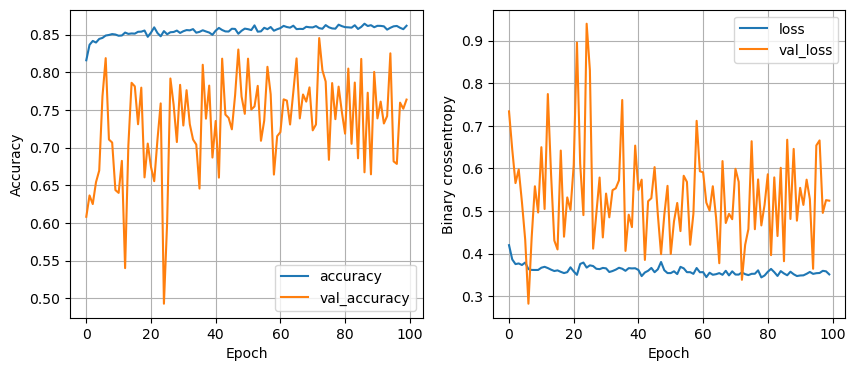

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.8822 - loss: 0.3360
16 nodes, dropout 0, learning_rate 0.1, batch size 64


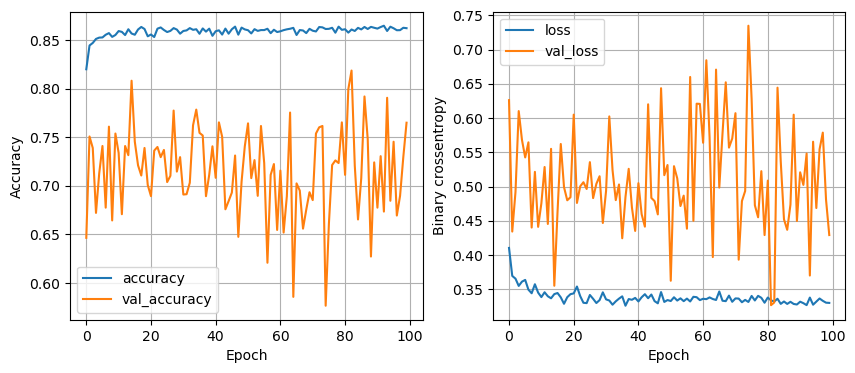

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.8737 - loss: 0.3168
16 nodes, dropout 0, learning_rate 0.1, batch size 128


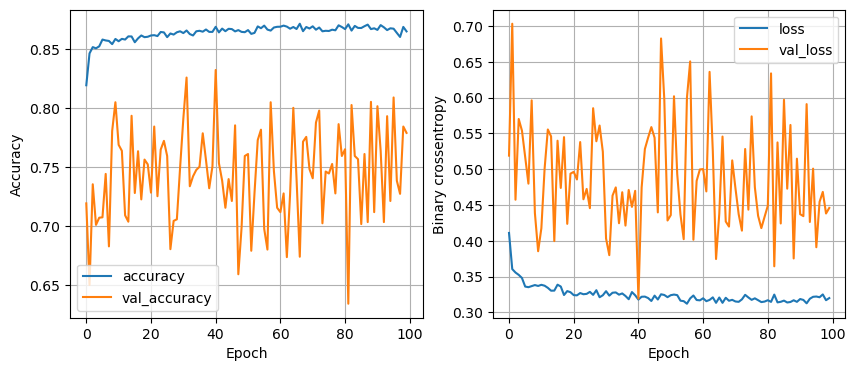

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.8720 - loss: 0.3067
16 nodes, dropout 0, learning_rate 0.005, batch size 32


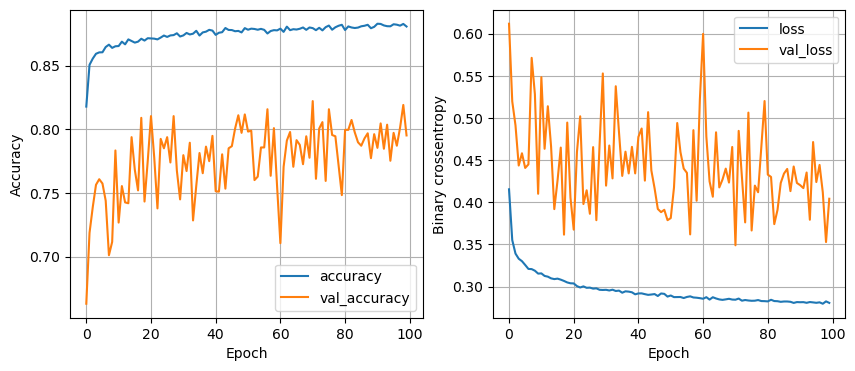

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - accuracy: 0.8732 - loss: 0.3098
16 nodes, dropout 0, learning_rate 0.005, batch size 64


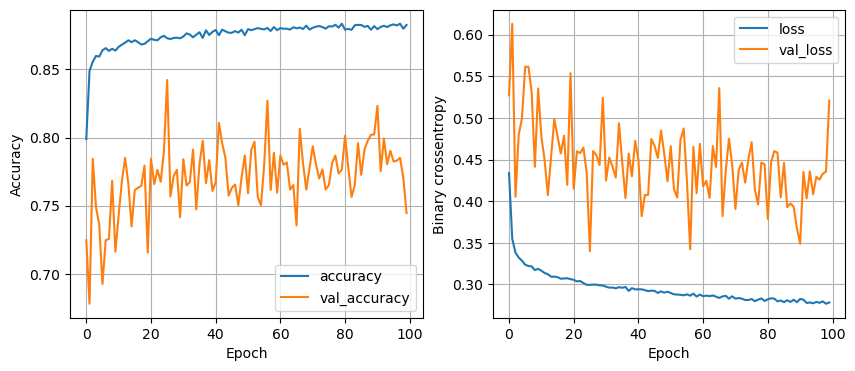

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - accuracy: 0.8664 - loss: 0.3159
16 nodes, dropout 0, learning_rate 0.005, batch size 128


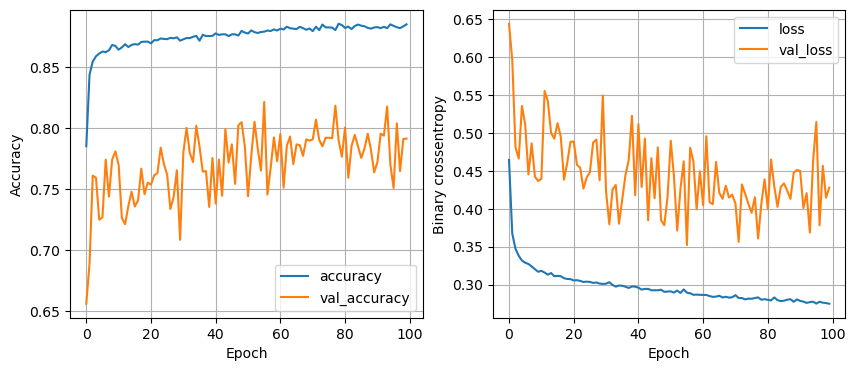

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.8787 - loss: 0.3127
16 nodes, dropout 0, learning_rate 0.001, batch size 32


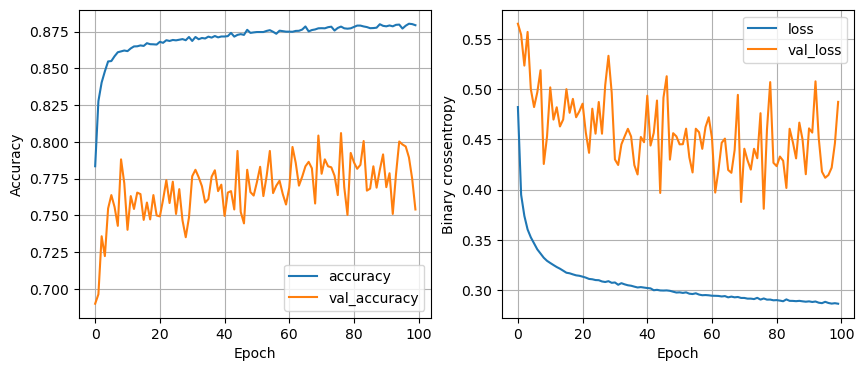

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.8707 - loss: 0.3064
16 nodes, dropout 0, learning_rate 0.001, batch size 64


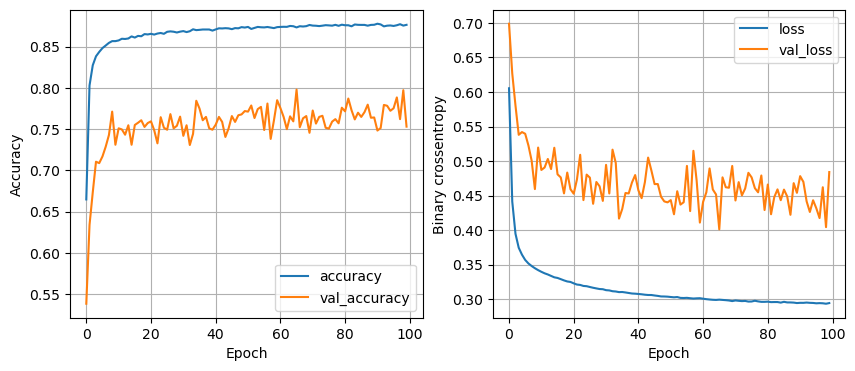

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - accuracy: 0.8814 - loss: 0.2943
16 nodes, dropout 0, learning_rate 0.001, batch size 128


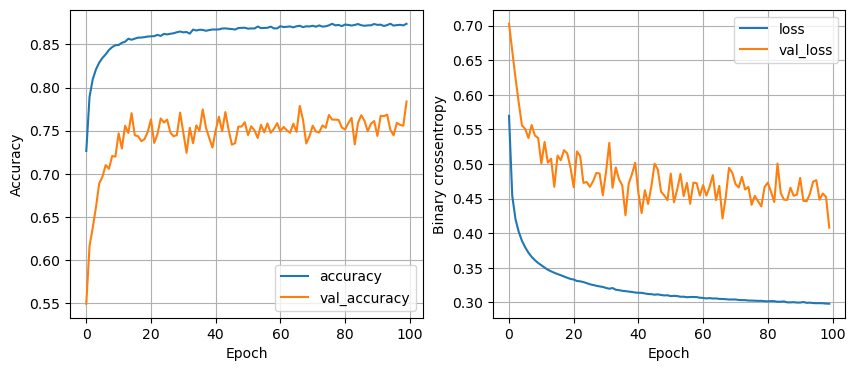

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.8782 - loss: 0.3010
16 nodes, dropout 0.2, learning_rate 0.1, batch size 32


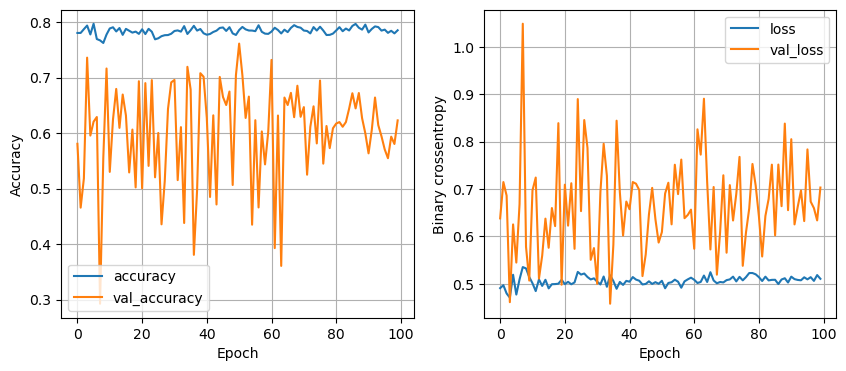

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.8426 - loss: 0.4355
16 nodes, dropout 0.2, learning_rate 0.1, batch size 64


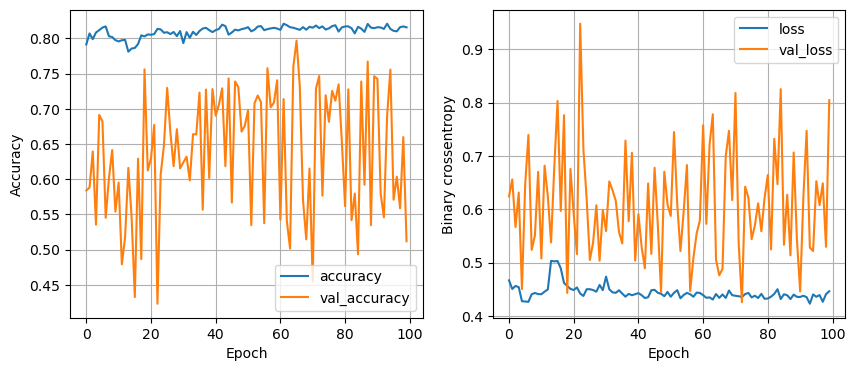

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - accuracy: 0.8204 - loss: 0.4131
16 nodes, dropout 0.2, learning_rate 0.1, batch size 128


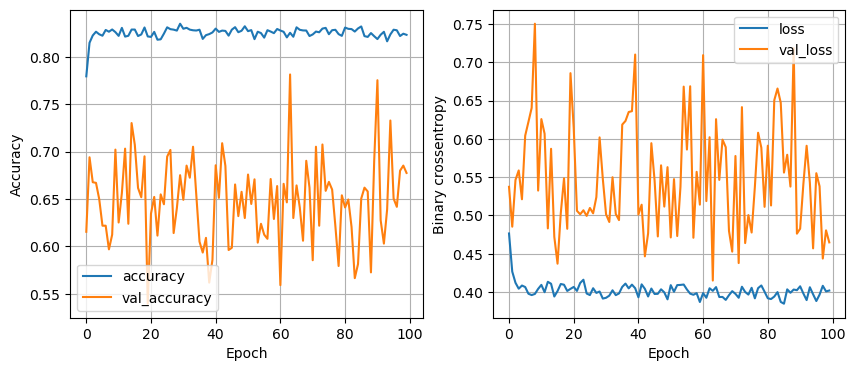

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.8577 - loss: 0.3462
16 nodes, dropout 0.2, learning_rate 0.005, batch size 32


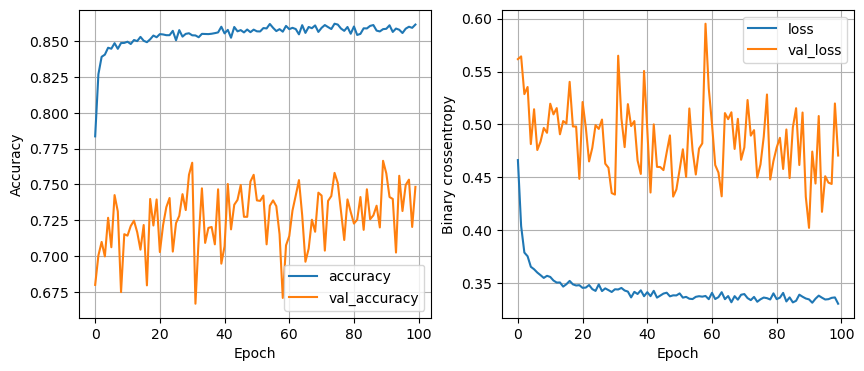

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.8736 - loss: 0.3035
16 nodes, dropout 0.2, learning_rate 0.005, batch size 64


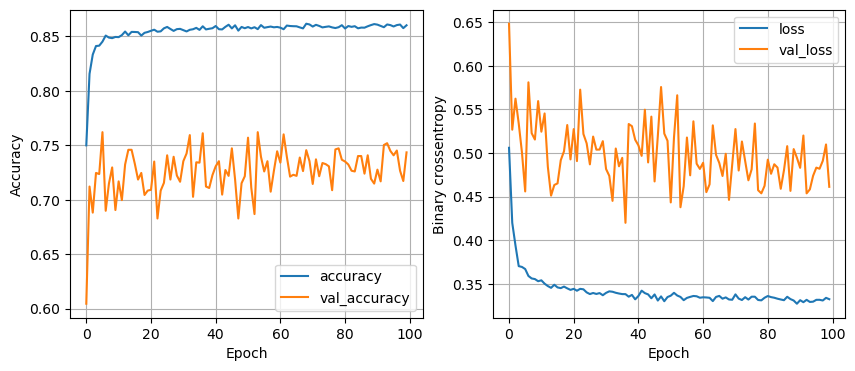

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.8710 - loss: 0.3052
16 nodes, dropout 0.2, learning_rate 0.005, batch size 128


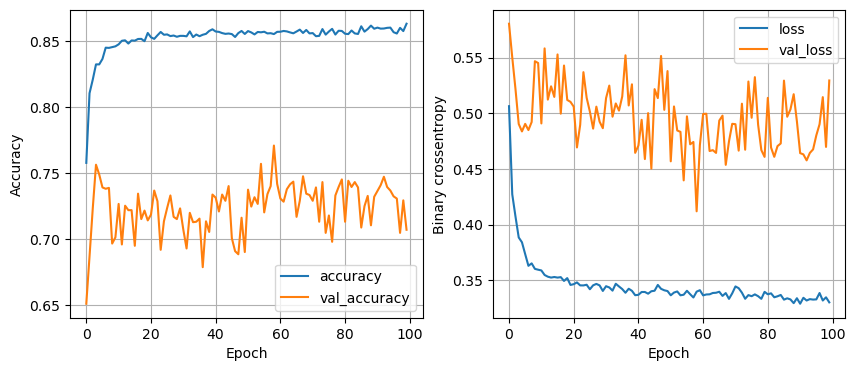

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.8687 - loss: 0.3114
16 nodes, dropout 0.2, learning_rate 0.001, batch size 32


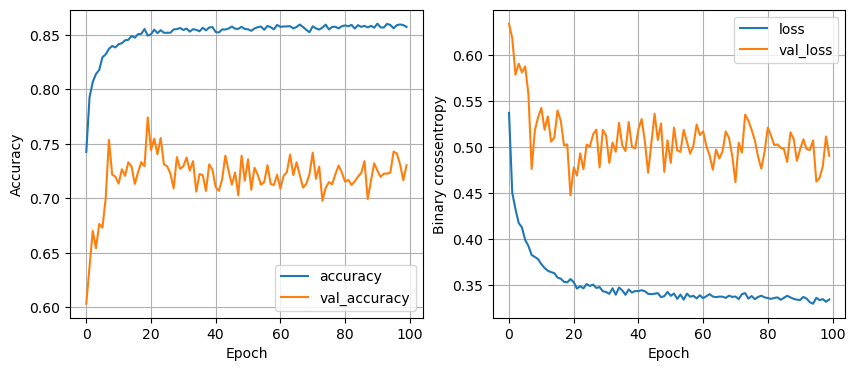

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.8727 - loss: 0.3041
16 nodes, dropout 0.2, learning_rate 0.001, batch size 64


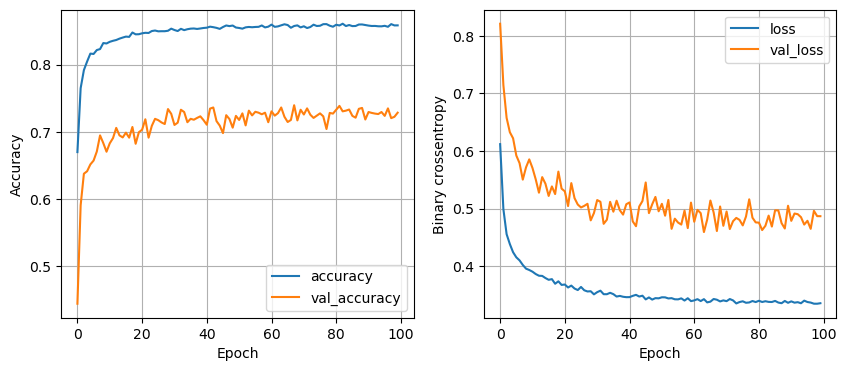

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - accuracy: 0.8691 - loss: 0.3067
16 nodes, dropout 0.2, learning_rate 0.001, batch size 128


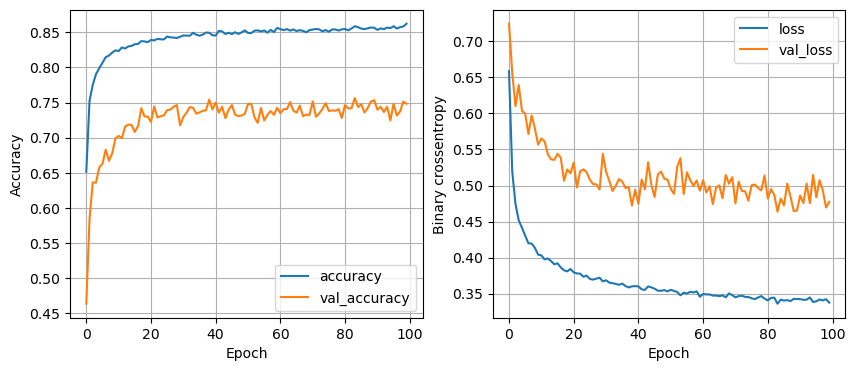

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - accuracy: 0.8724 - loss: 0.3051
32 nodes, dropout 0, learning_rate 0.1, batch size 32


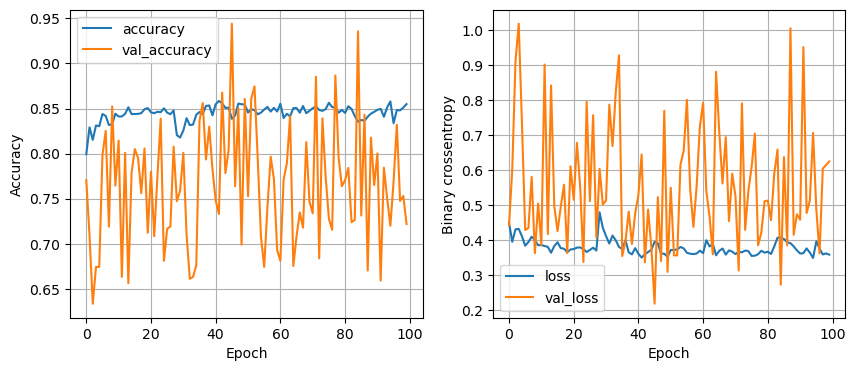

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.8646 - loss: 0.3655
32 nodes, dropout 0, learning_rate 0.1, batch size 64


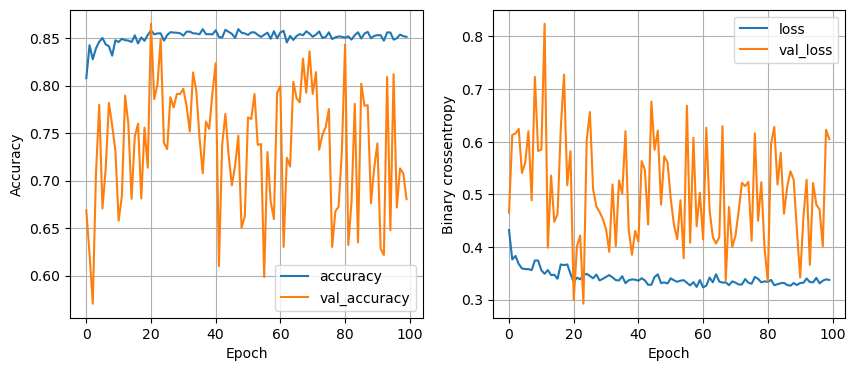

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.8680 - loss: 0.3275
32 nodes, dropout 0, learning_rate 0.1, batch size 128


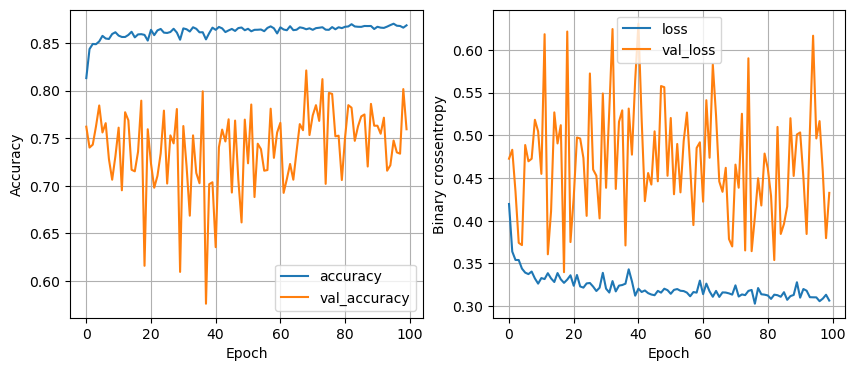

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.8637 - loss: 0.3209
32 nodes, dropout 0, learning_rate 0.005, batch size 32


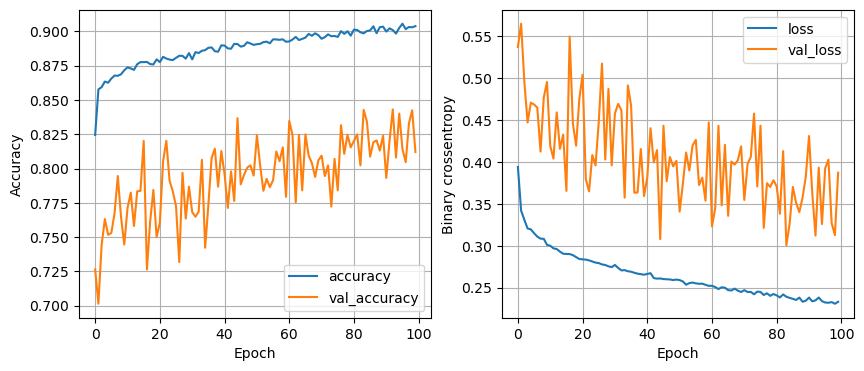

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.8717 - loss: 0.3738
32 nodes, dropout 0, learning_rate 0.005, batch size 64


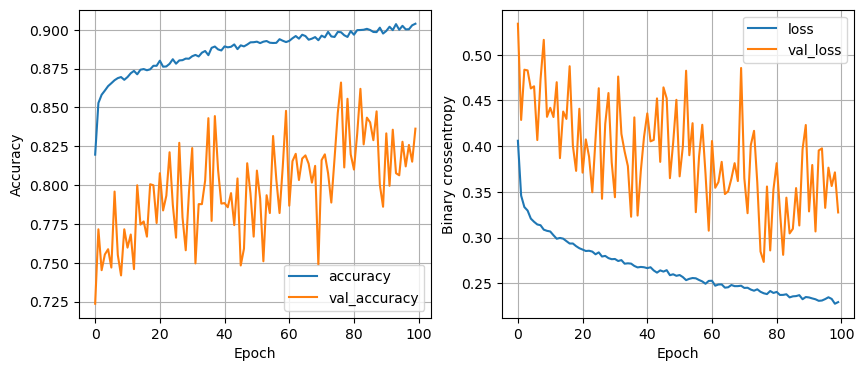

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.8771 - loss: 0.3378
32 nodes, dropout 0, learning_rate 0.005, batch size 128


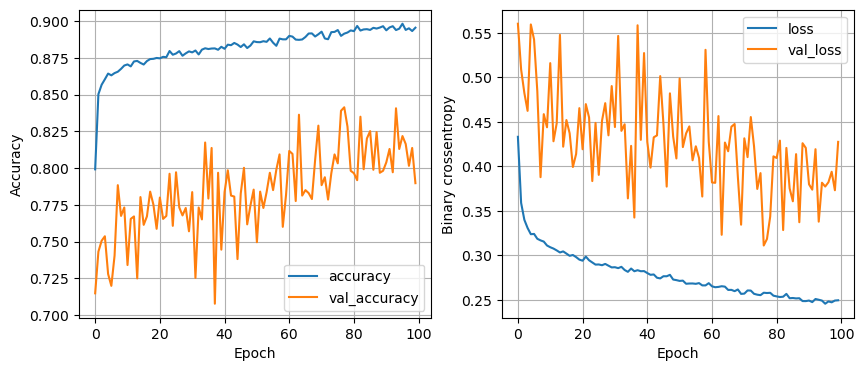

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.8723 - loss: 0.3220
32 nodes, dropout 0, learning_rate 0.001, batch size 32


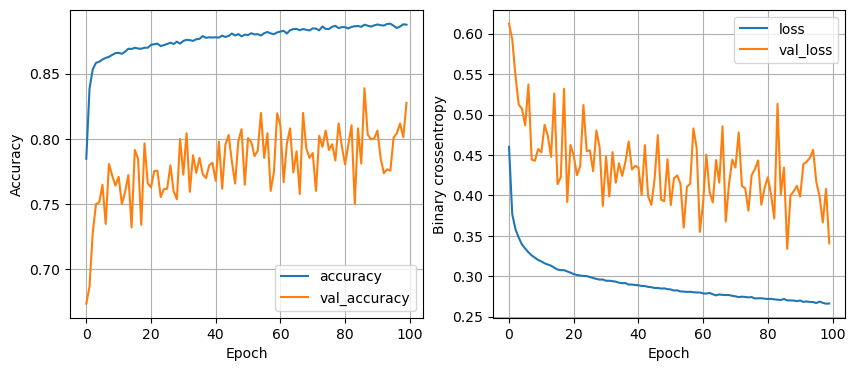

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.8776 - loss: 0.3093
32 nodes, dropout 0, learning_rate 0.001, batch size 64


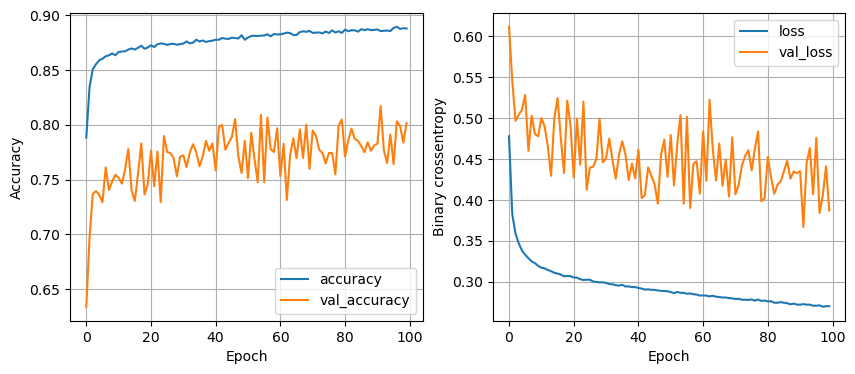

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - accuracy: 0.8788 - loss: 0.3054
32 nodes, dropout 0, learning_rate 0.001, batch size 128


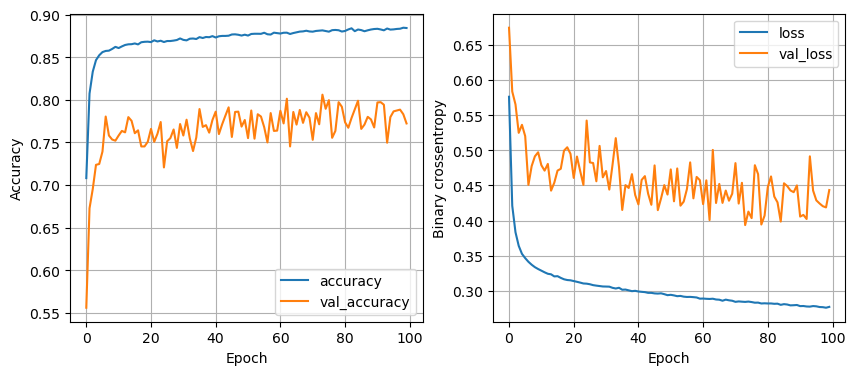

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.8781 - loss: 0.2982
32 nodes, dropout 0.2, learning_rate 0.1, batch size 32


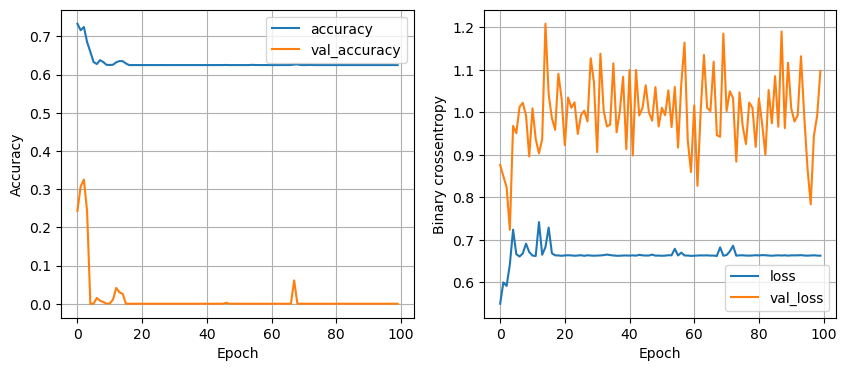

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - accuracy: 0.6529 - loss: 0.6460
32 nodes, dropout 0.2, learning_rate 0.1, batch size 64


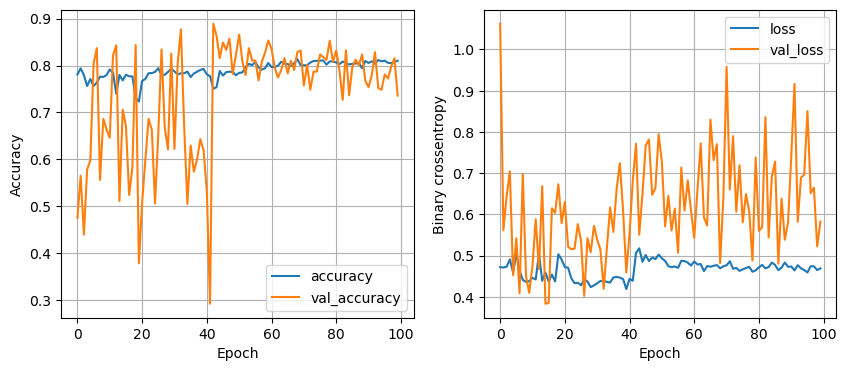

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.8585 - loss: 0.4169
32 nodes, dropout 0.2, learning_rate 0.1, batch size 128


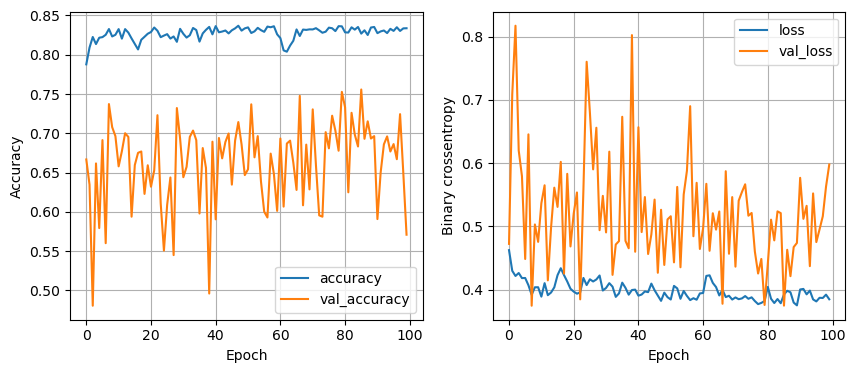

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - accuracy: 0.8427 - loss: 0.3579
32 nodes, dropout 0.2, learning_rate 0.005, batch size 32


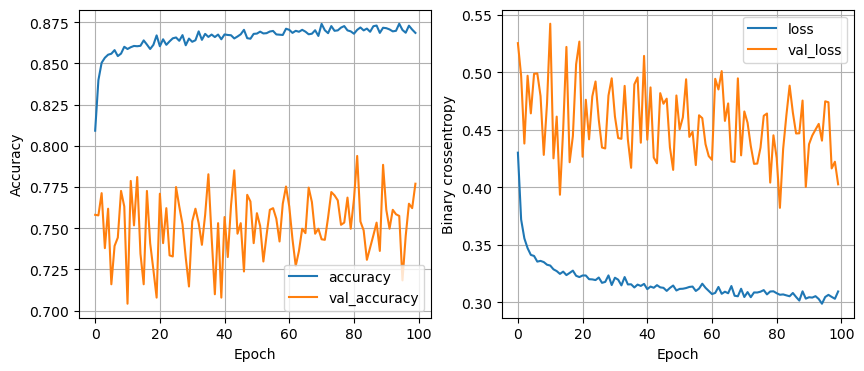

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.8701 - loss: 0.3070
32 nodes, dropout 0.2, learning_rate 0.005, batch size 64


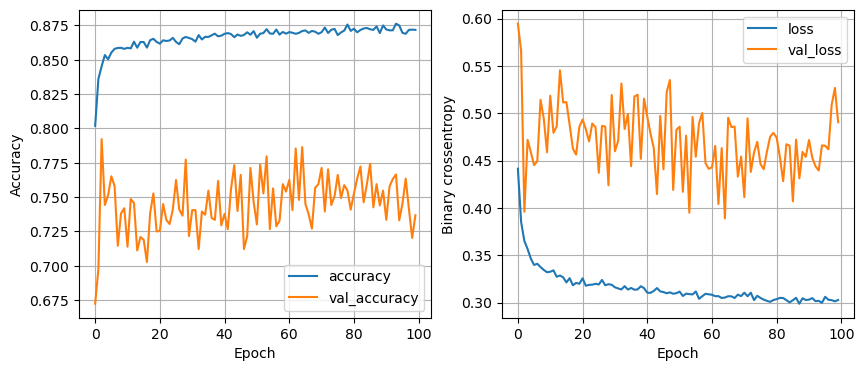

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.8685 - loss: 0.3001
32 nodes, dropout 0.2, learning_rate 0.005, batch size 128


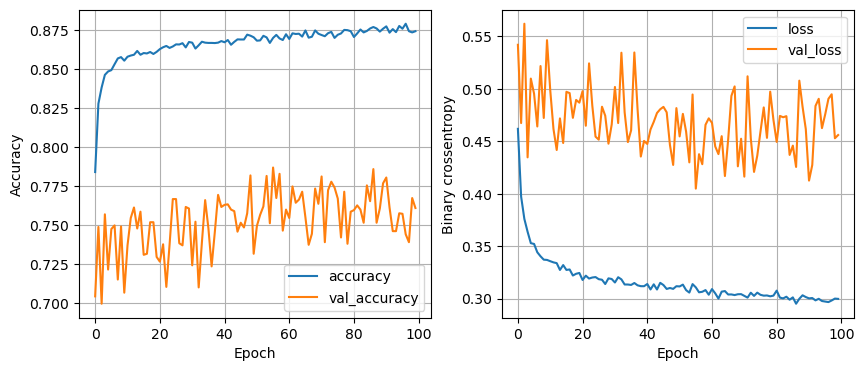

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.8784 - loss: 0.2895
32 nodes, dropout 0.2, learning_rate 0.001, batch size 32


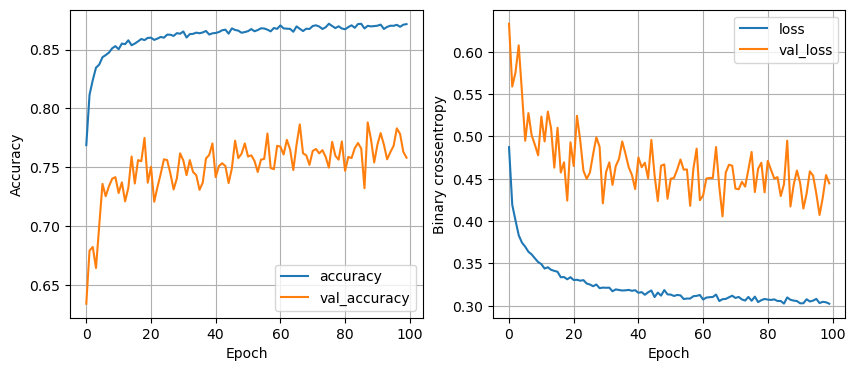

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - accuracy: 0.8715 - loss: 0.2961
32 nodes, dropout 0.2, learning_rate 0.001, batch size 64


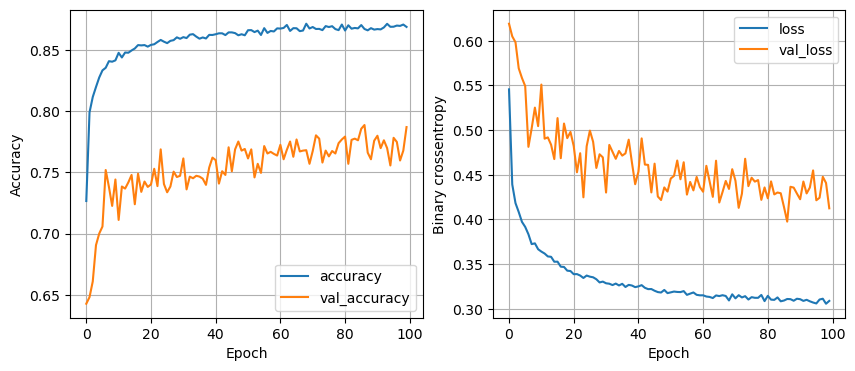

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.8754 - loss: 0.2970
32 nodes, dropout 0.2, learning_rate 0.001, batch size 128


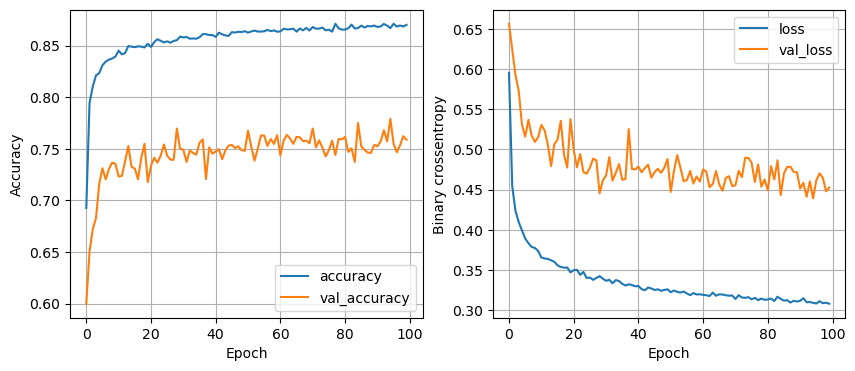

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.8757 - loss: 0.2988
64 nodes, dropout 0, learning_rate 0.1, batch size 32


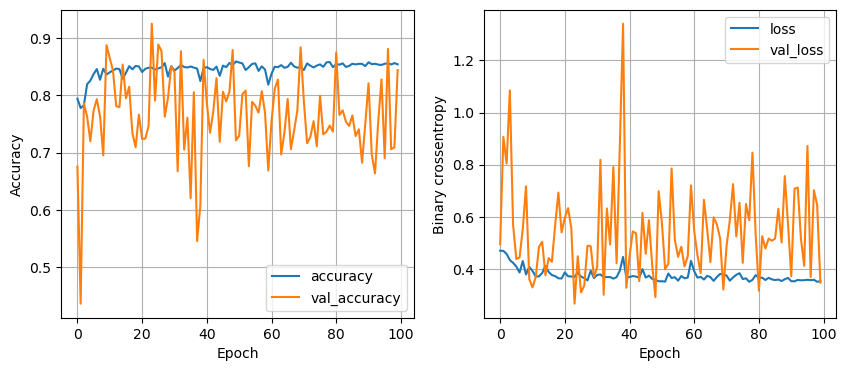

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.8610 - loss: 0.3510
64 nodes, dropout 0, learning_rate 0.1, batch size 64


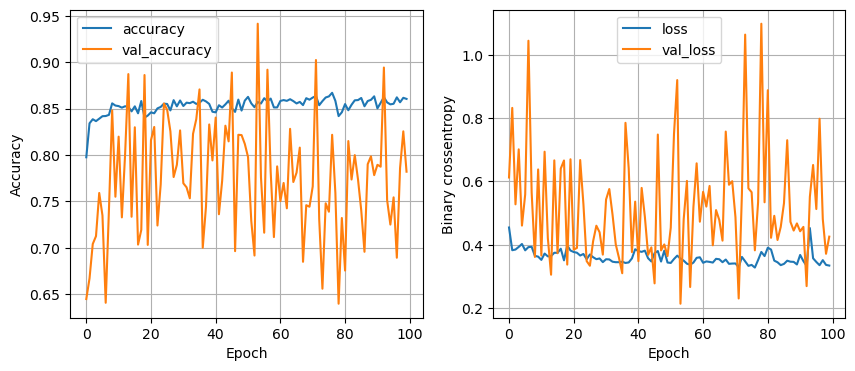

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.8703 - loss: 0.3541
64 nodes, dropout 0, learning_rate 0.1, batch size 128


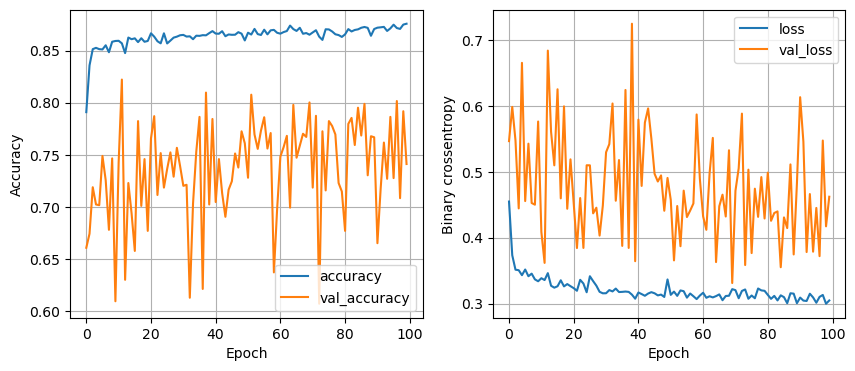

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.8700 - loss: 0.3308
64 nodes, dropout 0, learning_rate 0.005, batch size 32


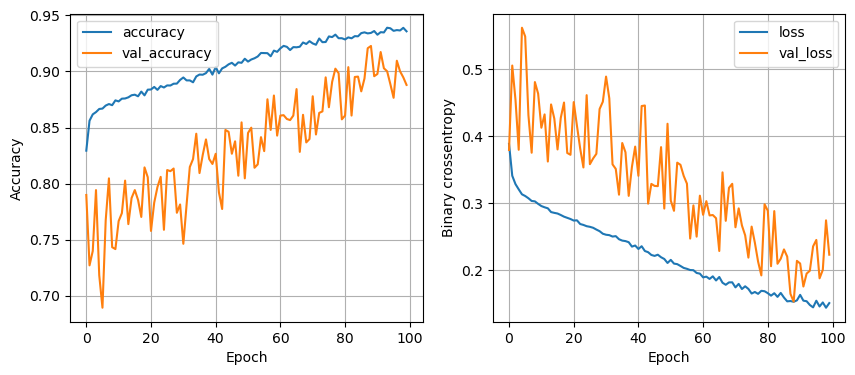

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.8699 - loss: 0.5472
64 nodes, dropout 0, learning_rate 0.005, batch size 64


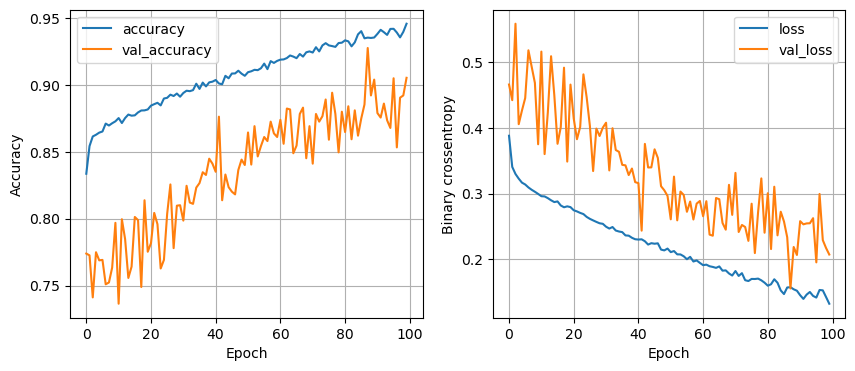

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.8689 - loss: 0.5321
64 nodes, dropout 0, learning_rate 0.005, batch size 128


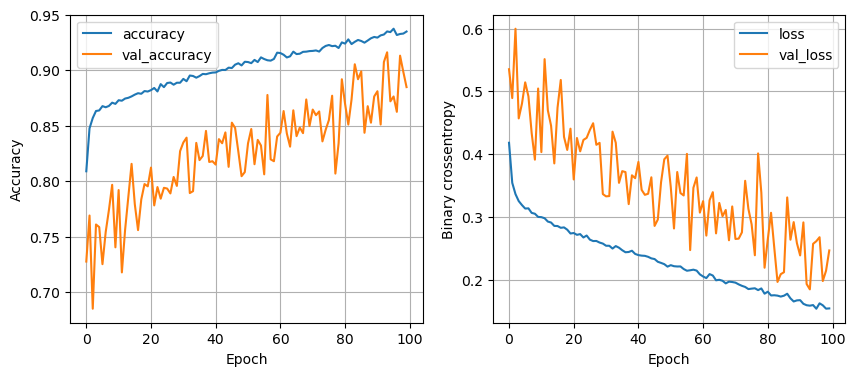

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - accuracy: 0.8639 - loss: 0.5038
64 nodes, dropout 0, learning_rate 0.001, batch size 32


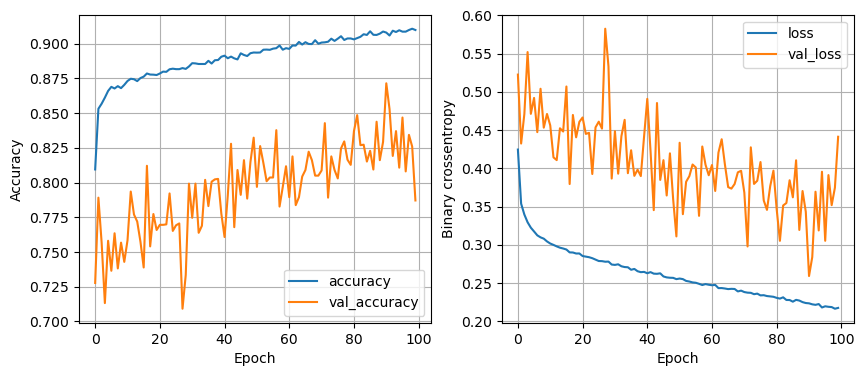

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.8775 - loss: 0.3284
64 nodes, dropout 0, learning_rate 0.001, batch size 64


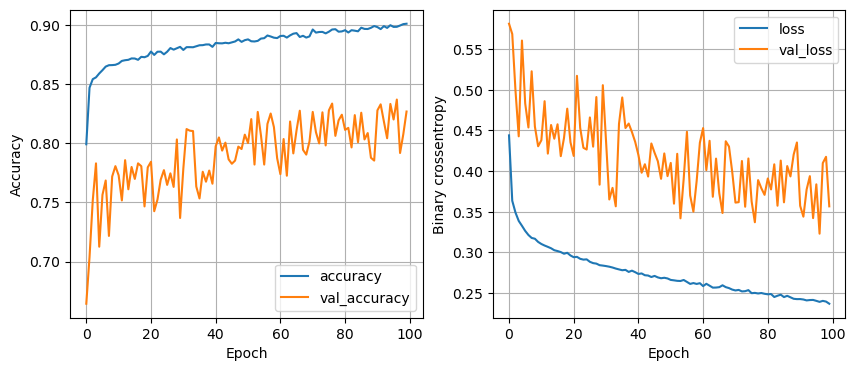

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - accuracy: 0.8765 - loss: 0.3221
64 nodes, dropout 0, learning_rate 0.001, batch size 128


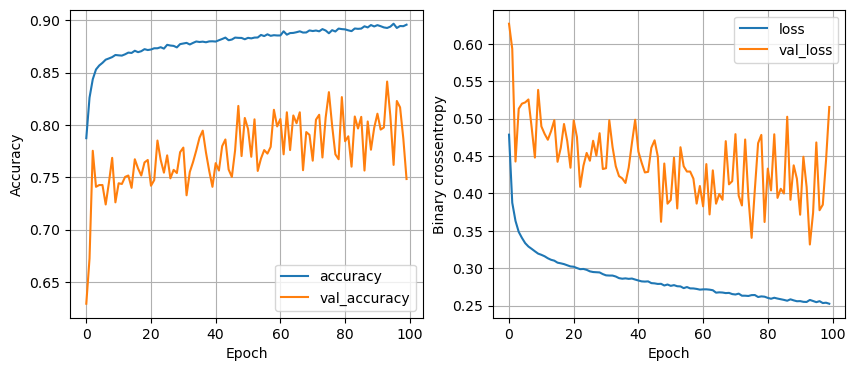

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.8801 - loss: 0.3097
64 nodes, dropout 0.2, learning_rate 0.1, batch size 32


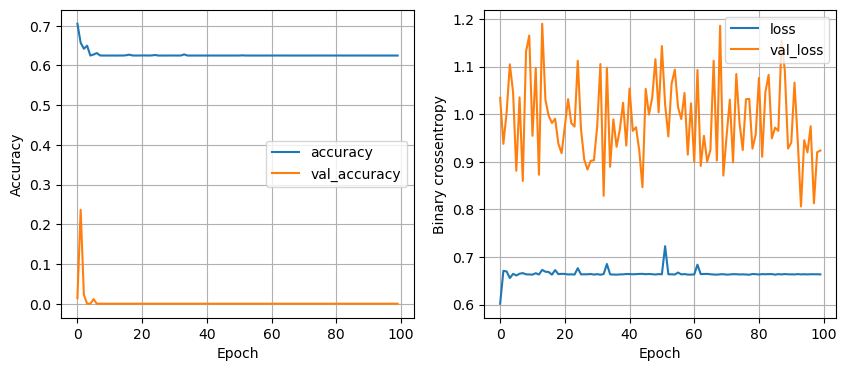

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.6529 - loss: 0.6509
64 nodes, dropout 0.2, learning_rate 0.1, batch size 64


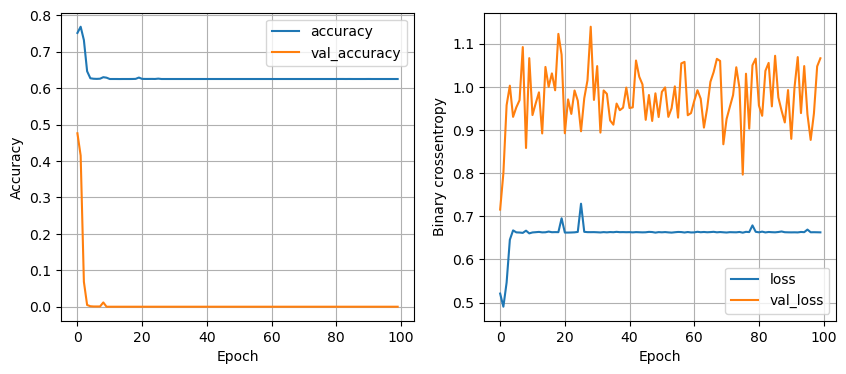

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.6529 - loss: 0.6456
64 nodes, dropout 0.2, learning_rate 0.1, batch size 128


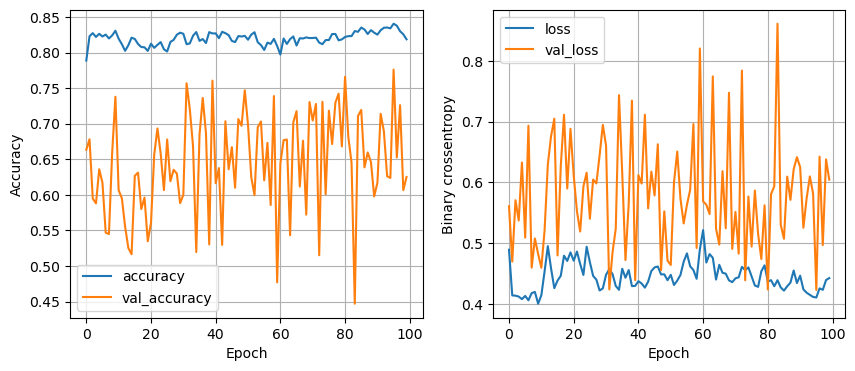

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - accuracy: 0.8454 - loss: 0.4060
64 nodes, dropout 0.2, learning_rate 0.005, batch size 32


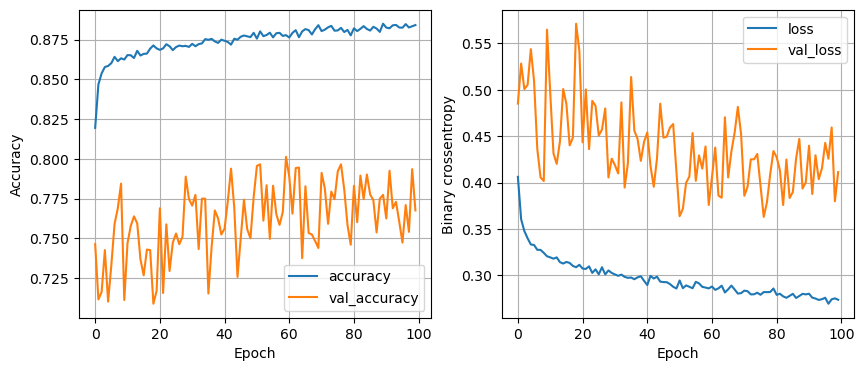

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.8793 - loss: 0.3063
64 nodes, dropout 0.2, learning_rate 0.005, batch size 64


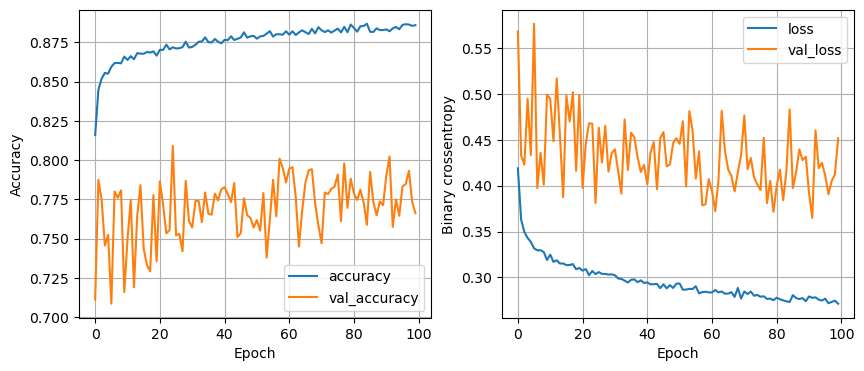

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - accuracy: 0.8817 - loss: 0.2925
64 nodes, dropout 0.2, learning_rate 0.005, batch size 128


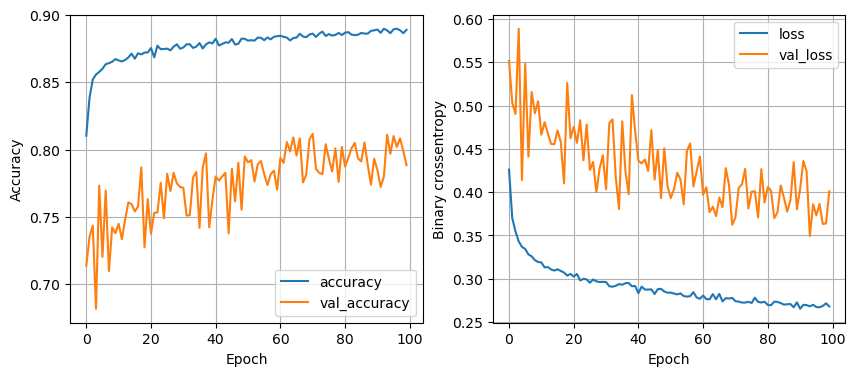

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - accuracy: 0.8807 - loss: 0.2906
64 nodes, dropout 0.2, learning_rate 0.001, batch size 32


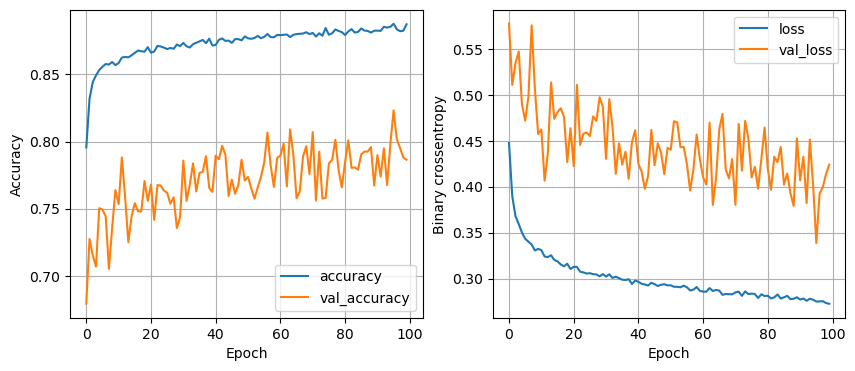

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.8815 - loss: 0.2938
64 nodes, dropout 0.2, learning_rate 0.001, batch size 64


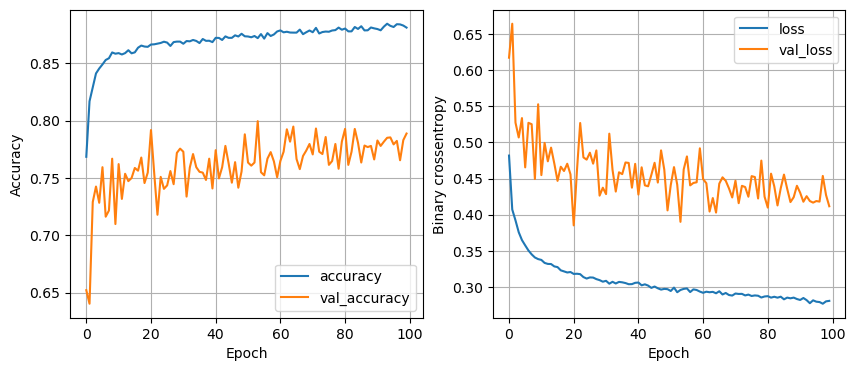

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.8814 - loss: 0.2880
64 nodes, dropout 0.2, learning_rate 0.001, batch size 128


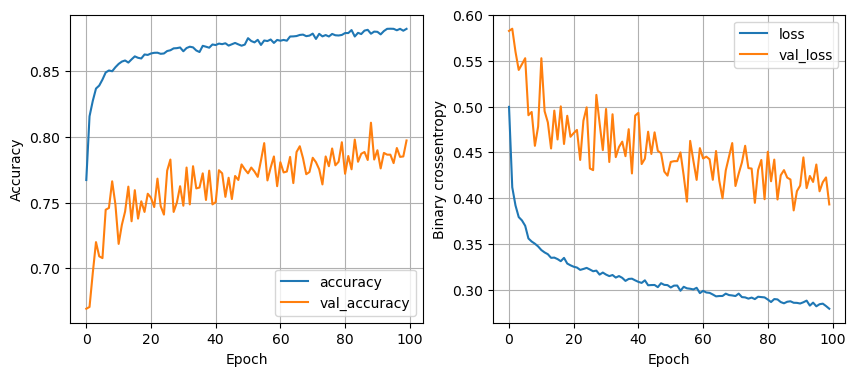

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - accuracy: 0.8810 - loss: 0.2852


In [175]:
# Initialize the variable to track the lowest validation loss and the corresponding model
least_val_loss = float('inf')  # Set to infinity initially to ensure any loss will be smaller
least_loss_model = None  # Will store the model with the least validation loss

# Number of epochs for training
epochs = 100

# Loop over different hyperparameter combinations: number of nodes, dropout probability, learning rate, and batch size
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for learning_rate in [0.1, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                # Print current configuration being tested
                print(f"{num_nodes} nodes, dropout {dropout_prob}, learning_rate {learning_rate}, batch size {batch_size}")
                
                # Train the model with the current combination of hyperparameters
                model, history = train_model(
                    x_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs
                )

                # Plot the accuracy and loss history for the current model
                plot_history(history)

                # Evaluate the model on validation data and get the validation loss
                val_loss = model.evaluate(x_valid, y_valid)[0]
                
                # If the current model's validation loss is the lowest so far, update the tracking variables
                if val_loss < least_val_loss:
                    least_val_loss = val_loss  # Update the least validation loss
                    least_loss_model = model  # Update the model with the least validation loss

In [176]:
y_pred = least_loss_model.predict(x_test)  # Predict the probability for the test set
y_pred = (y_pred > .5).astype(int).reshape(-1)  # Convert probabilities to binary predictions

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1331
           1       0.89      0.93      0.91      2473

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

